In [1]:
import numpy as np
from numba import njit
from matplotlib import pyplot as plt

from modules import first_order_rk4

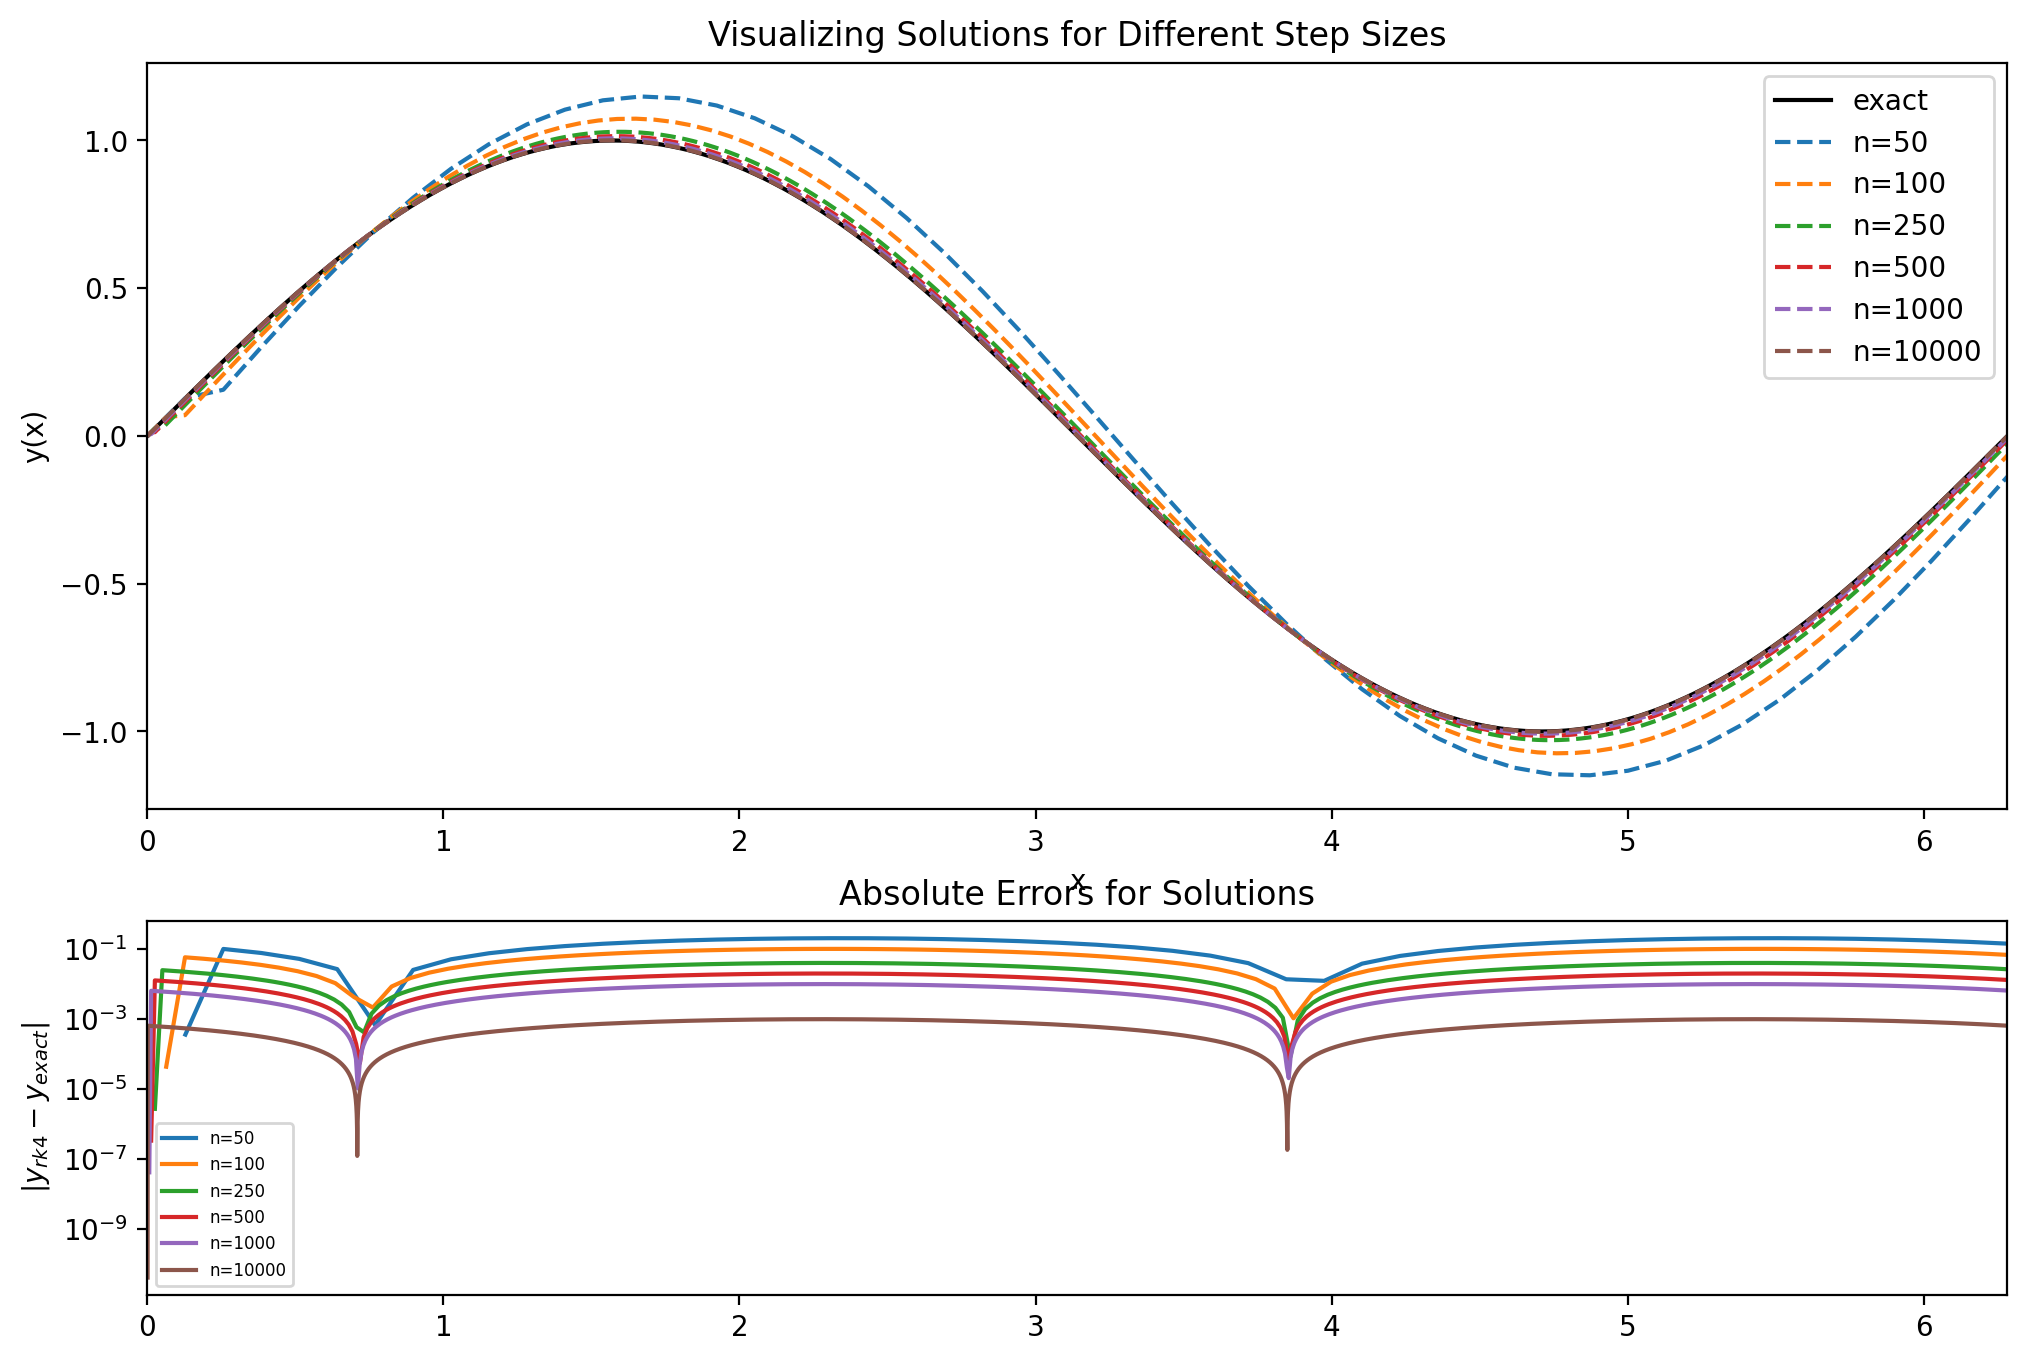

In [2]:
@njit(fastmath=True)
def test_ode_func(x, y):
    return np.sin(x)


x_1, dx_1 = np.linspace(0, 2 * np.pi, 50, retstep=True)
x_2, dx_2 = np.linspace(0, 2 * np.pi, 100, retstep=True)
x_3, dx_3 = np.linspace(0, 2 * np.pi, 250, retstep=True)
x_4, dx_4 = np.linspace(0, 2 * np.pi, 500, retstep=True)
x_5, dx_5 = np.linspace(0, 2 * np.pi, 1000, retstep=True)
x_6, dx_6 = np.linspace(0, 2 * np.pi, 10000, retstep=True)

y_1 = first_order_rk4(x_1, 0, dx_1, test_ode_func)
y_2 = first_order_rk4(x_2, 0, dx_2, test_ode_func)
y_3 = first_order_rk4(x_3, 0, dx_3, test_ode_func)
y_4 = first_order_rk4(x_4, 0, dx_4, test_ode_func)
y_5 = first_order_rk4(x_5, 0, dx_5, test_ode_func)
y_6 = first_order_rk4(x_6, 0, dx_6, test_ode_func)


fig, ax = plt.subplots(2, 1, dpi=200, figsize=(12, 8), height_ratios=[4, 2])
ax[0].set_title("Visualizing Solutions for Different Step Sizes")
ax[0].plot(x_6, np.sin(x_6), color="black", label="exact")
ax[0].plot(x_1, y_1, linestyle="--", label="n=50")
ax[0].plot(x_2, y_2, linestyle="--", label="n=100")
ax[0].plot(x_3, y_3, linestyle="--", label="n=250")
ax[0].plot(x_4, y_4, linestyle="--", label="n=500")
ax[0].plot(x_5, y_5, linestyle="--", label="n=1000")
ax[0].plot(x_6, y_6, linestyle="--", label="n=10000")
ax[0].set_xlabel("x")
ax[0].set_xlim(x_1[0], x_1[-1])
ax[0].set_ylabel("y(x)")
ax[0].legend()

ax[1].set_title("Absolute Errors for Solutions")
ax[1].plot(x_1[1:], np.abs(y_1[1:] - np.sin(x_1[1:])), label="n=50")
ax[1].plot(x_2[1:], np.abs(y_2[1:] - np.sin(x_2[1:])), label="n=100")
ax[1].plot(x_3[1:], np.abs(y_3[1:] - np.sin(x_3[1:])), label="n=250")
ax[1].plot(x_4[1:], np.abs(y_4[1:] - np.sin(x_4[1:])), label="n=500")
ax[1].plot(x_5[1:], np.abs(y_5[1:] - np.sin(x_5[1:])), label="n=1000")
ax[1].plot(x_6[1:], np.abs(y_6[1:] - np.sin(x_6[1:])), label="n=10000")
ax[0].set_xlabel("x")
ax[1].set_xlim(x_1[0], x_1[-1])
ax[1].set_ylabel("$|y_{rk4} - y_{exact}|$")
ax[1].set_yscale("log")
ax[1].legend(fontsize=6)

plt.show()

In [3]:
# import timeit
# 
# print("time for 100 point solution")
# %timeit first_order_rk4(x_2, 0, dx_2, test_ode_func)  # 4.45 µs ± 34.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
# print("time for 10_000 point solution")
# %timeit first_order_rk4(x_6, 0, dx_6, test_ode_func)  # 98.1 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

## check the cpp code

In [4]:
import pandas

In [5]:
# run the cpp code
! g++ TOV_solver.cpp -o ./test_run
!./test_run

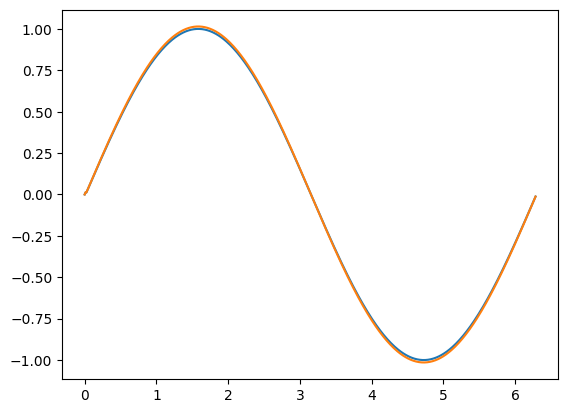

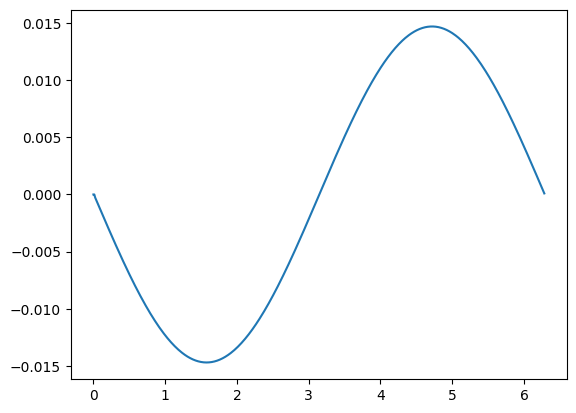

In [7]:
y_cpp= np.array(pandas.read_csv("test_file.txt", header=None))[:, 0]


plt.plot(x_4, y_cpp)
plt.plot(x_4, y_4)
plt.show()

plt.plot(x_4, y_cpp - y_4)
plt.show()